# Example: CitiBike data

Adapted from Kelsey Jordahl
https://gist.github.com/kjordahl/5957573

In [1]:
import requests  
import json
from pyproj import Proj
from shapely.geometry import Point
import geopandas as gp

NYC borough boundaries downloaded from [Bytes of the Big Apple](http://www.nyc.gov/html/dcp/download/bytes/nybb_13a.zip)

In [2]:
boros = gp.GeoDataFrame.from_file('nybb_15b/nybb.shp')

Load real time bike station data from [CitiBike](http://citibikenyc.com) json API:

In [3]:
# get the bike data and convert it to a ditcionary
endpoint_url = 'http://citibikenyc.com/stations/json'
response = requests.get(endpoint_url)
data = json.loads(response.text)


In [4]:
# convert the relevant part to a geodataframe
df = gp.GeoDataFrame(data['stationBeanList'])
df.head()

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks
0,,11,22,,304,,2019-02-18 04:49:54 PM,40.704633,,-74.013617,,Broadway & Battery Pl,,Broadway & Battery Pl,1,In Service,False,33
1,,22,22,,377,,2019-02-18 04:49:32 PM,40.722438,,-74.005664,,6 Ave & Canal St,,6 Ave & Canal St,1,In Service,False,45
2,,26,12,,402,,2019-02-18 04:51:36 PM,40.740343,,-73.989551,,Broadway & E 22 St,,Broadway & E 22 St,1,In Service,False,39
3,,14,19,,3236,,2019-02-18 04:51:37 PM,40.758985,,-73.993800,,W 42 St & Dyer Ave,,W 42 St & Dyer Ave,1,In Service,False,33
4,,4,15,,3255,,2019-02-18 04:51:16 PM,40.750585,,-73.994685,,8 Ave & W 31 St,,8 Ave & W 31 St,1,In Service,False,19


In [5]:
# there is one row for each bike station.  How many stations are there? 
len(df)

814

In [6]:
# in the file above, there are lon-lats, but no geometry field
# we need to set that up

s = gp.GeoSeries([Point(x, y) for x, y in zip(df['longitude'], df['latitude'])])
df['geometry'] = s
df.crs = {'init': 'epsg:4326', 'no_defs': True}
df.geometry.total_bounds

array([-74.0836394 ,  40.65539977, -73.9077436 ,  40.81439444])

In [7]:
# make sure they are on the same CRS.  
# checking the bounds is a nice way of seeing this
df.to_crs(boros.crs, inplace=True)
df.geometry.total_bounds

RuntimeError: b'no arguments in initialization list'

In [8]:
# the geometry objects can do lots of cool stuff.  For example: 

manhattan = boros.geometry[3]
in_mn = df.geometry.within(manhattan)
print(sum(in_mn), 'stations in Manhattan')

0 stations in Manhattan


# Your turn

You can read about the range of operations available in geopandas here: 
    
http://geopandas.org/index.html

Your assignment is to: 

1. Calculate how many stations are in each borough
2. Calculate how many bikes are currently available in each borough
3. Read about and try at least two new spatial or geometric operations (beyond what I've covered here). 

In [11]:

#Calculate number of stations in each borough
staten_island = boros.geometry[0]
in_si = df.geometry.within(staten_island)
print(sum(in_si), 'stations in Staten Island')

brooklyn = boros.geometry[1]
in_br = df.geometry.within(brooklyn)
print(sum(in_br), 'stations in Brooklyn')

queens = boros.geometry[2]
in_qu = df.geometry.within(queens)
print(sum(in_qu), 'stations in Queens')

manhattan = boros.geometry[3]
in_mn = df.geometry.within(manhattan)
print(sum(in_mn), 'stations in Manhattan')

bronx = boros.geometry[4]
in_bx = df.geometry.within(bronx)
print(sum(in_bx), 'stations in Bronx')

0 stations in Staten Island
0 stations in Brooklyn
0 stations in Queens
0 stations in Manhattan
0 stations in Bronx


In [12]:
#Map of CitiBike stations with NYC boros
base = boros.plot(figsize=(10, 10))
df.plot(ax=base, figsize=(10, 10), color='red', markersize=5)

Problem 2

In [18]:
#Calculate number of bikes available in each borough
print(sum(df.geometry.within(staten_island)[df['availableBikes']]),'Bikes available in Staten Island')
print(sum(df.geometry.within(brooklyn)[df['availableBikes']]),'Bikes available in Brooklyn')
print(sum(df.geometry.within(queens)[df['availableBikes']]),'Bikes available in Queens')
print(sum(df.geometry.within(manhattan)[df['availableBikes']]),'Bikes available in Manhattan')
print(sum(df.geometry.within(bronx)[df['availableBikes']]),'Bikes available in Bronx')

0 Bikes available in Staten Island
0 Bikes available in Brooklyn
0 Bikes available in Queens
0 Bikes available in Manhattan
0 Bikes available in Bronx


Problem 3

In [19]:
boros.geometry.unary_union

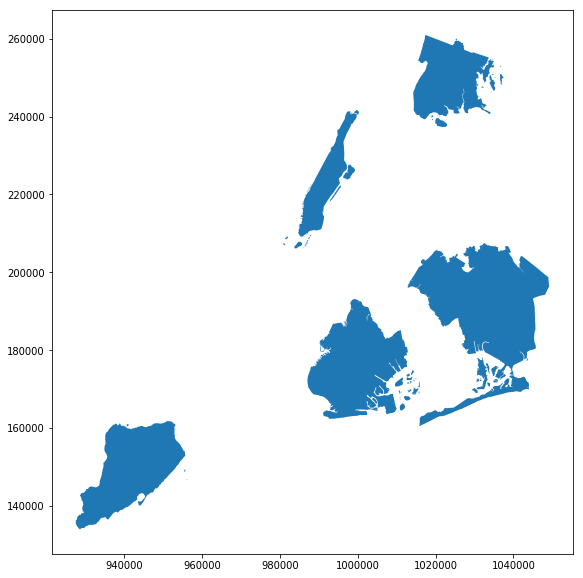

In [55]:
scale=boros.geometry.scale(xfact=0.5, yfact=0.5, zfact=1.0, origin='center')
scale.plot(figsize=(10,10))